# 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/seyda/Desktop/Data Immersion/Achivement 6'

In [4]:
df = pd.read_csv(os.path.join(path,'Medical insurance','data', 'prepared_data','cleaned_medical.csv'))

In [5]:
df.shape

(1337, 9)

In [6]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,smoker_cat
0,0,19,female,27.900,0,yes,Southwest,16884.92400,1.0
1,1,18,male,33.770,1,no,Southeast,1725.55230,0.0
2,2,28,male,33.000,3,no,Southeast,4449.46200,0.0
3,3,33,male,22.705,0,no,Northwest,21984.47061,0.0
4,4,32,male,28.880,0,no,Northwest,3866.85520,0.0


In [7]:
df = df.drop(columns = 'Unnamed: 0')

In [8]:
df2 = df.drop(columns = ['sex','smoker', 'region'])

# 2 . The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) 
          for i in num_cl] 
# Defines k-means clusters in the range assigned above

In [10]:
score = [kmeans[i].fit(df2).score(df2) 
         for i in range(len(kmeans))] 
# Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-195939158900.84027,
 -47969960375.55761,
 -23015308842.481964,
 -12118189184.030231,
 -8535631138.307903,
 -6164408642.676015,
 -4432702152.448413,
 -3491416184.693328,
 -2778135287.5308]

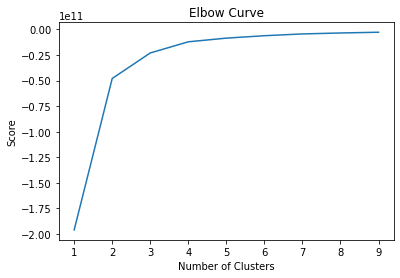

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal count for the cluster is 3 since the curve straightens out after 3 on the x-axis.


In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, init = 'k-means++') 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=3)

In [14]:
df2['clusters'] = kmeans.fit_predict(df2)

In [15]:
df2.head()

,age,bmi,children,charges,smoker_cat,clusters
0,19,27.900,0,16884.92400,1.0,1
1,18,33.770,1,1725.55230,0.0,0
2,28,33.000,3,4449.46200,0.0,0
3,33,22.705,0,21984.47061,0.0,1
4,32,28.880,0,3866.85520,0.0,0


In [16]:
df2['clusters'].value_counts()

0    910
1    270
2    157
Name: clusters, dtype: int64

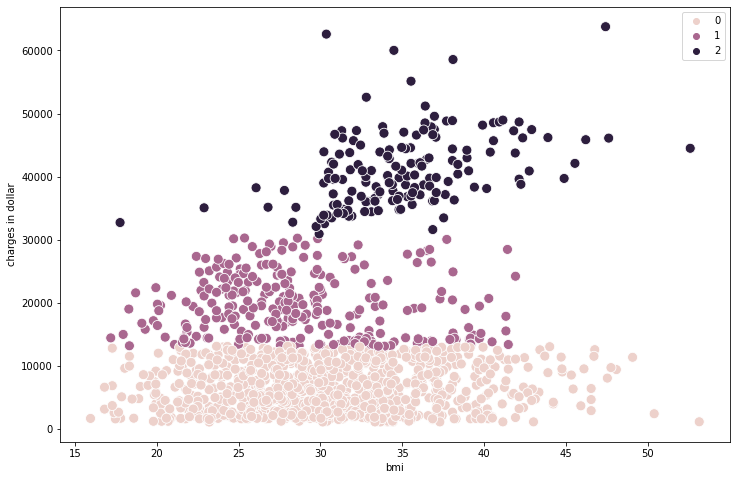

In [17]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['bmi'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bmi') # Label x-axis.
plt.ylabel('charges in dollar') # Label y-axis.
plt.show()

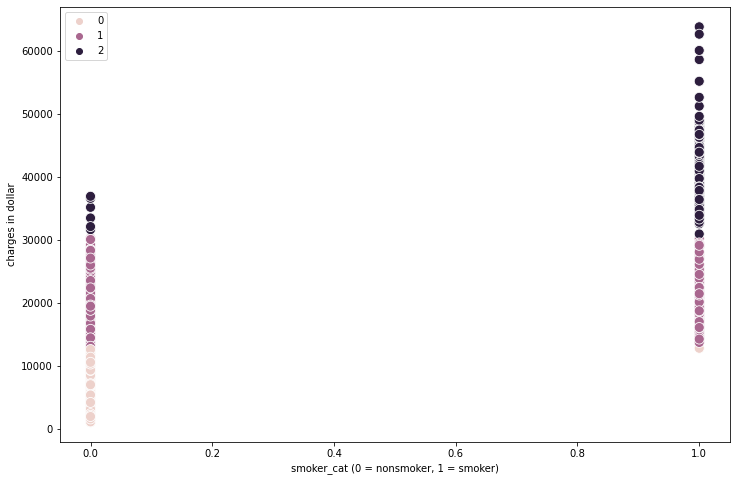

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['smoker_cat'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('smoker_cat (0 = nonsmoker, 1 = smoker)') # Label x-axis.
plt.ylabel('charges in dollar') # Label y-axis.
plt.show()

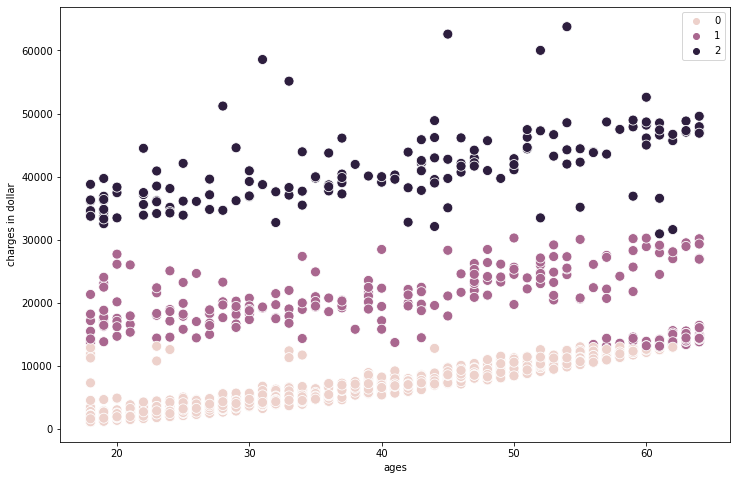

In [19]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['age'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ages') # Label x-axis.
plt.ylabel('charges in dollar') # Label y-axis.
plt.show()

In [20]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df2.groupby('cluster').agg({'age':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'smoker_cat':['mean', 'median'],
                          'charges':['mean', 'median']})

age               bmi         smoker_cat         \
                  mean median       mean  median       mean median   
cluster                                                              
dark purple  39.828025   41.0  35.023917  34.800   0.961783    1.0   
pink         37.567033   38.0  30.492544  30.115   0.001099    0.0   
purple       44.448148   47.0  28.703944  27.915   0.451852    0.0   

                  charges                
                     mean        median  
cluster                                  
dark purple  41097.912181  40003.332250  
pink          6600.283753   6367.275475  
purple       19613.166668  19074.327800

# Conclusion


 - The dark purple cluster has the best statistics than orher clusters. BMI and smoker people is higher in this group.
 - The age of people doesn't seem to matter much, since the best-rated cluster dark purple has a higher median age than pink cluster, but not the dark purple cluster.
 - You can see that people with higher bmi median and smoking behaviour have more medical charges.
 - There is still limitation in this analysis. For example, there should be more data sample and more columns to explore have a conclusion.

In [22]:
df_merged = df.merge(df2, on = ['bmi','charges','age','children','smoker_cat'])

In [23]:
df_merged.head()

,age,sex,bmi,children,smoker,region,charges,smoker_cat,clusters,cluster
0,19,female,27.900,0,yes,Southwest,16884.92400,1.0,1,purple
1,18,male,33.770,1,no,Southeast,1725.55230,0.0,0,pink
2,28,male,33.000,3,no,Southeast,4449.46200,0.0,0,pink
3,33,male,22.705,0,no,Northwest,21984.47061,0.0,1,purple
4,32,male,28.880,0,no,Northwest,3866.85520,0.0,0,pink


In [24]:
country = {'Southwest':'US', 'Southeast':'US', 'Northeast':'US', 'Northwest':'US'}
df_merged['country'] = df_merged['region'].map(country)

In [25]:
df_merged.to_csv(os.path.join(path,'Medical insurance', 'data', 'prepared_data','medical_data_cluster.csv'))